# Lets code our algorithm

In [1]:
#liabraries required
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
import numpy as np

In [103]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [83]:
#generaating sample points
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=5,cluster_std=0.40, random_state=0)

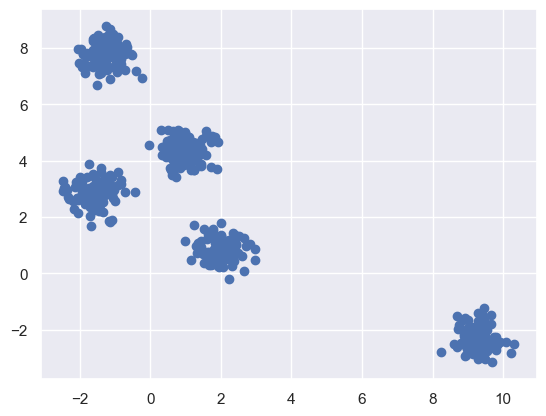

In [84]:
#plotting the dataset
plt.scatter(X[:,0],X[:,1])
plt.show()

### From naked eyes we can clearly see that there are 4 clusters  in the dataset 

In [85]:
#fitting and predicting the kmeans algorithm
from sklearn.cluster import KMeans

#creating kmean object with 4 clusters
kmeans = KMeans(n_clusters=4)

#fitting the algorithm
kmeans.fit(X)

#predicting the clsuters
y_kmeans = kmeans.predict(X)

/Users/shinchan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
#prediction showing the the dataset belongs to which cluster
y_kmeans

array([3, 0, 0, 0, 0, 1, 0, 1, 3, 3, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 3, 1,
       0, 0, 3, 2, 3, 3, 2, 0, 3, 0, 0, 2, 0, 3, 3, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 1, 0, 3, 2, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 3, 1, 3, 0, 0, 2,
       0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 1, 3, 1, 0,
       0, 0, 0, 2, 2, 0, 1, 3, 3, 0, 2, 0, 3, 2, 2, 3, 2, 0, 1, 3, 3, 0,
       0, 0, 3, 1, 1, 2, 2, 2, 3, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 3,
       0, 1, 2, 1, 1, 1, 0, 0, 3, 2, 3, 0, 3, 1, 1, 2, 3, 0, 0, 2, 2, 3,
       0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 3, 3, 0, 3, 1, 3, 0, 0, 1, 1, 3, 2,
       0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 3, 0, 2, 1, 2, 3, 1, 0, 3, 0, 0, 1,
       2, 2, 3, 2, 0, 2, 2, 3, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 3, 3, 0,
       3, 0, 1, 1, 1, 0, 0, 1, 1, 0, 3, 0, 0, 2, 2, 0, 2, 0, 1, 0, 3, 0,
       2, 1, 3, 3, 2, 2, 3, 1, 1, 0, 3, 3, 0, 0, 0, 0, 0, 2, 1, 0, 2, 3,
       0, 0, 1, 3, 0, 0, 0, 2, 0, 3, 2, 3, 2, 3, 2, 2, 0, 3, 3, 3, 0, 3,
       2, 0, 2, 1, 0, 0, 0, 0, 3, 1, 2, 0, 1, 2, 1,

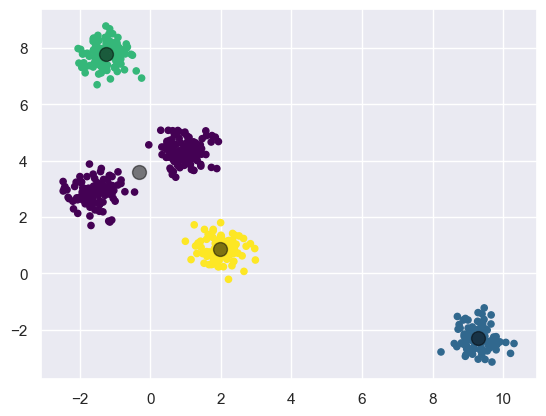

In [87]:
#visualizing the 4 cluster with different colors and there centroids
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

#finding the centrodids for each clusters
centers = kmeans.cluster_centers_

#plotting the centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

In [88]:
#quick view of centroid
centers

array([[-0.31149211,  3.60919918],
       [ 9.28510086, -2.29391247],
       [-1.26927837,  7.78360769],
       [ 1.9876471 ,  0.85602104]])

## Now the question arises how to identify the value of k , that we use k = 4 in the above example

#### Method 1 - Elbow method

In [107]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

In [108]:
wcss

[13605.277262867634,
 3610.1852206466247,
 1442.4915173716079,
 584.7561154350556,
 152.83373481402953,
 139.82068424720455,
 129.1027525328173,
 118.48715514375937,
 107.088220097768,
 98.1225462207154]

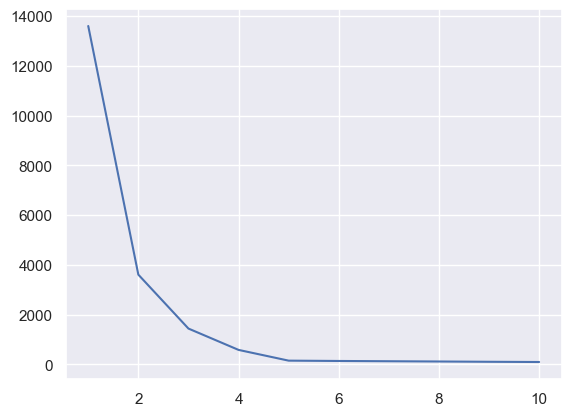

In [109]:
plt.plot(range(1,11),wcss)
plt.show()

#### Method 2: Silhoutte score

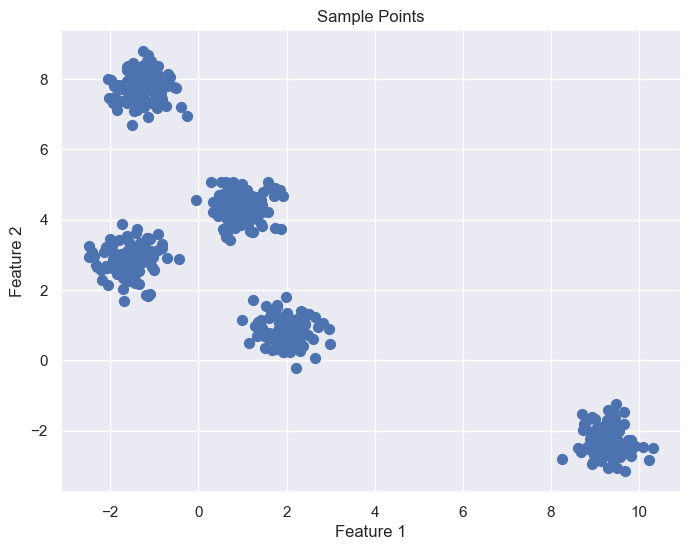

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# Generate sample points
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.40, random_state=0)

# Plot sample points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Sample Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Silhouette score for 2 clusters: 0.7185693763260989
Silhouette score for 3 clusters: 0.6583056040939291
Silhouette score for 4 clusters: 0.7199839693355914
Silhouette score for 5 clusters: 0.8126659651729236
Silhouette score for 6 clusters: 0.7255609230753233


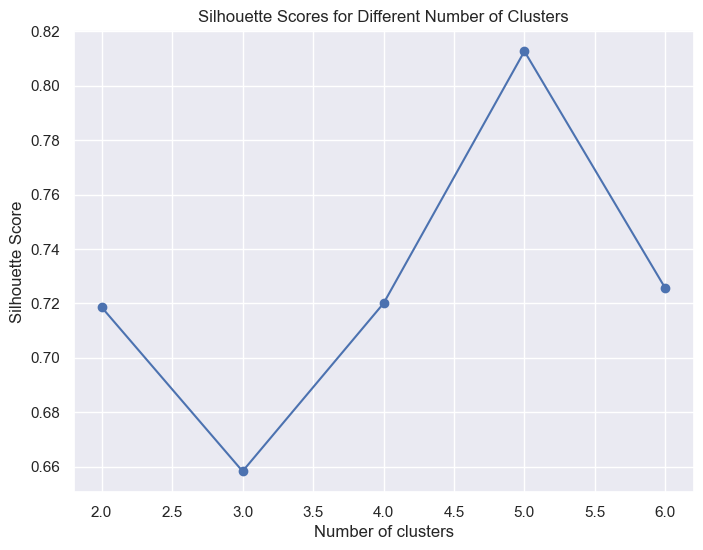

In [105]:
from sklearn.metrics import silhouette_score

# List to store silhouette scores
silhouette_scores = []

# Perform k-means clustering for each cluster number from 2 to 6
for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette score for {n_clusters} clusters: {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

####  silhouette plot

For n_clusters = 2, the average silhouette_score is: 0.7185693763260989


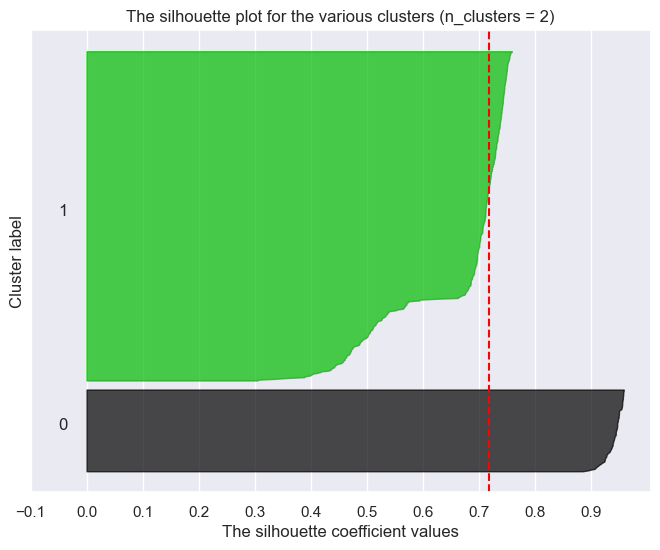

For n_clusters = 3, the average silhouette_score is: 0.6583056040939291


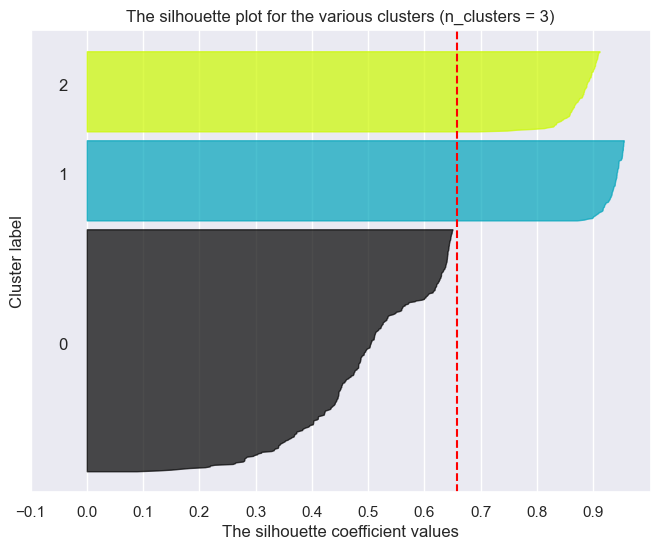

For n_clusters = 4, the average silhouette_score is: 0.7199839693355914


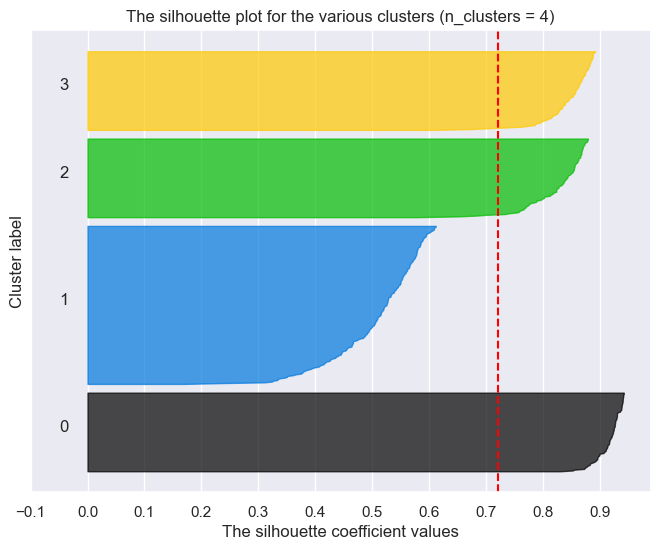

For n_clusters = 5, the average silhouette_score is: 0.8126659651729236


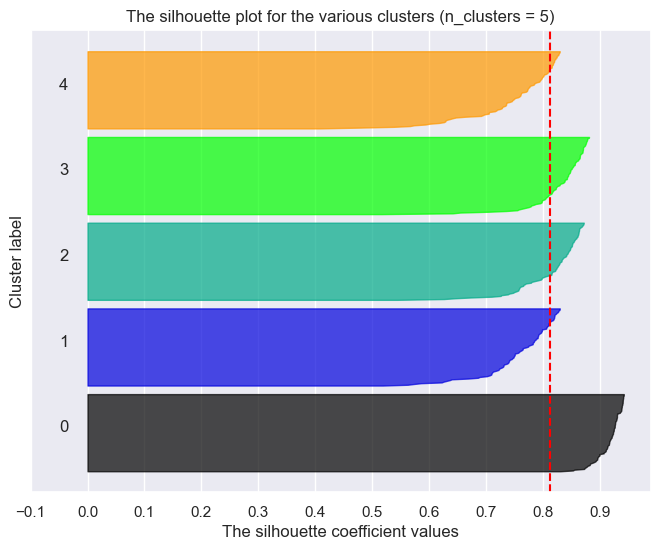

For n_clusters = 6, the average silhouette_score is: 0.7255609230753233


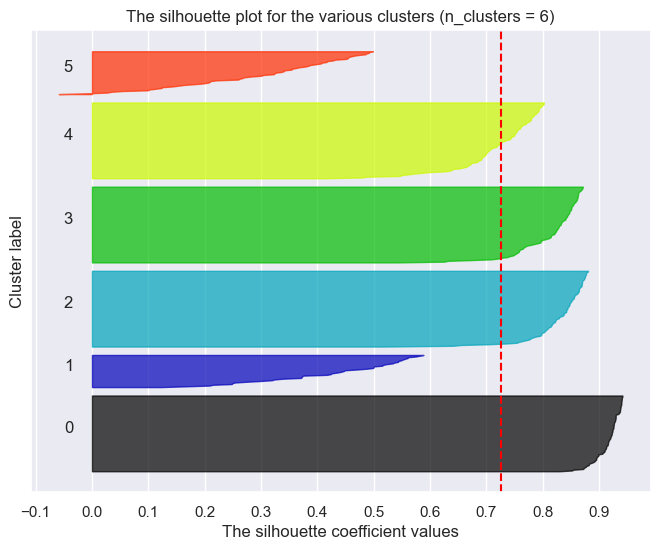

In [115]:
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

for n_clusters in range(2, 7):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)
    
    #Initialize the clusterer with n_clusters value and a random generator seed for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10  # Starting position for the silhouette plot
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, 
                          ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers in the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10  # Update y_lower for the next plot
    
    ax1.set_title(f"The silhouette plot for the various clusters (n_clusters = {n_clusters})")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks(np.arange(-0.1, 1, 0.1))

    plt.show()


## Concept of kernelised kmeans clusteting - spectral clustering

In [126]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.07, random_state=0)

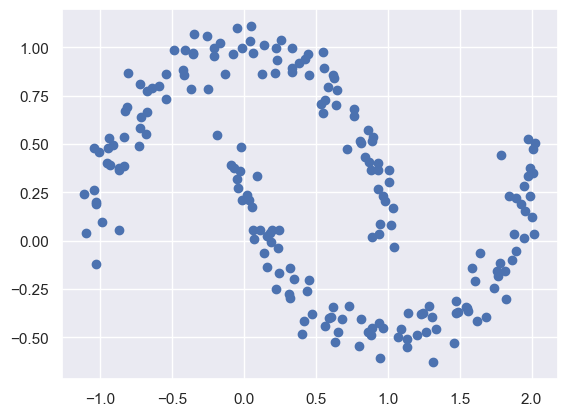

In [129]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

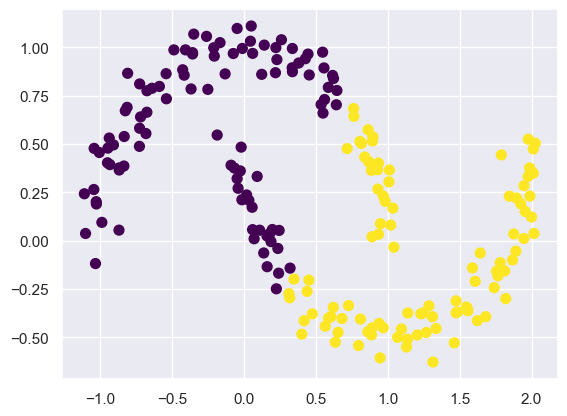

In [128]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
plt.show()

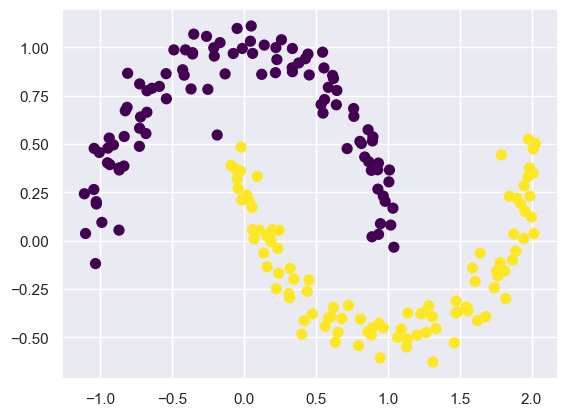

In [131]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')

labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
plt.show()

### K MEAN ALGORTIHM - EXPECTATION - MAXIMIZATION

##### the expectation–maximization approach here consists of the following procedure:
##### 1 ) Guess some cluster centers
##### 2 ) Repeat until converged
##### E-Step: assign points to the nearest cluster center
##### M-Step: set the cluster centers to the mean

#### Caveats of expectation–maximization
#### There are a few issues to be aware of when using the expectation–maximization algorithm.
#### 1. The globally optimal result may not be achieved.
#### 2. The number of clusters must be selected beforehand.
#### 3. k-means is limited to linear cluster boundaries .
#### 4. k-means can be slow for large numbers of samples

## K-Means on 3-D Data

In [132]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [133]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [135]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

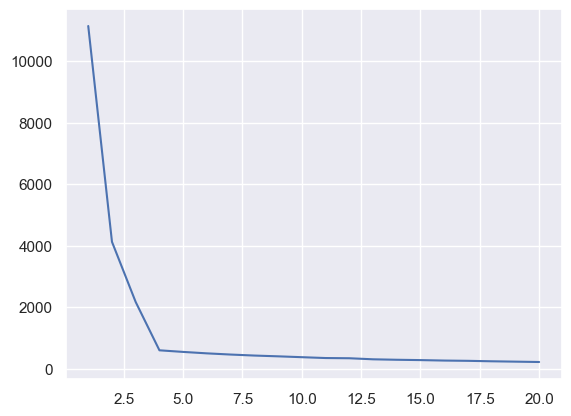

In [137]:
plt.plot(range(1,21),wcss)
plt.show()

In [138]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [139]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [140]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()

# THANK YOU !